In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [2]:
def imshow(img_array, cmap=False):
    plt.axis('off')
    if cmap:
        plt.imshow(img_array, cmap='gray')
    else:
        plt.imshow(img_array)
    plt.show()

## 图像相加
$$
G(x, y) = \alpha A(x, y) +(1-\alpha)B(x, y) 
$$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


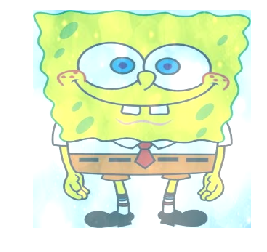

In [3]:
front = cv2.imread('front.png')
bg = cv2.imread('background.jpg' )

front = cv2.cvtColor(front, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)


front = cv2.resize(front, (300, 300))
bg = cv2.resize(bg, (300, 300))


alpha = 0.5
img_add = alpha*front +(1-alpha)*bg
img_add = img_add/(img_add.max()-img_add.min()) # result 1


imshow(img_add)

### 图像减法

$$
A(x, y) = G(x, y)-B(x,y)
$$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


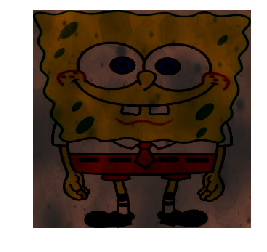

In [4]:
img_front = img_add - bg/255 # result 2
imshow(img_front)

### Mask
局部显示

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


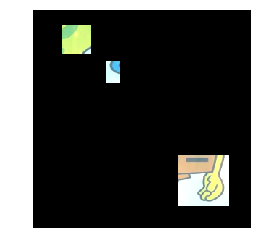

In [5]:
mask = np.zeros((300, 300, 3))
mask[20:60, 40:80] = 1
mask[70:100, 100:120] = 1
mask[200:270, 200:270] = 1
img_mask = img_add * mask   # result 3

imshow(img_mask)

## 逻辑运算
$$
与: A(x, y) \vee B(x, y)
$$
$$
或： A(x, y) \land B(x, y)
$$
$$
非： 255 - A(x, y)
$$
$$
异或： A(x, y) \otimes B(x, y)
$$

In [6]:
mask = np.zeros((300, 300))
img = cv2.imread('front.png', 0)
img = cv2.resize(img, (300, 300))

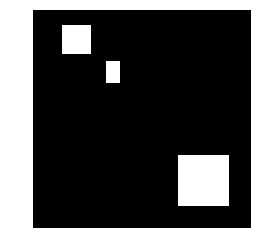

In [7]:
mask[20:60, 40:80] = 1
mask[70:100, 100:120] = 1
mask[200:270, 200:270] = 1

imshow(mask, cmap='gray')

In [8]:
mask = mask.astype(img.dtype)

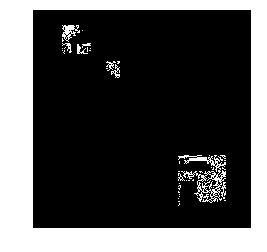

In [9]:
# 与运算
img_and = cv2.bitwise_and(img, mask)
imshow(img_and, cmap='gray')

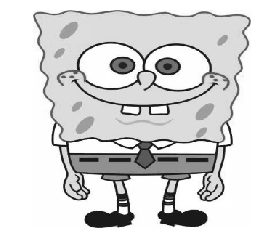

In [10]:
# 异或运算
img_xor = cv2.bitwise_xor(img, mask)
imshow(img_xor, cmap='gray')

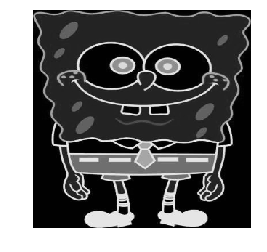

In [11]:
img_or = cv2.bitwise_not(img)
imshow(img_or, cmap='gray')

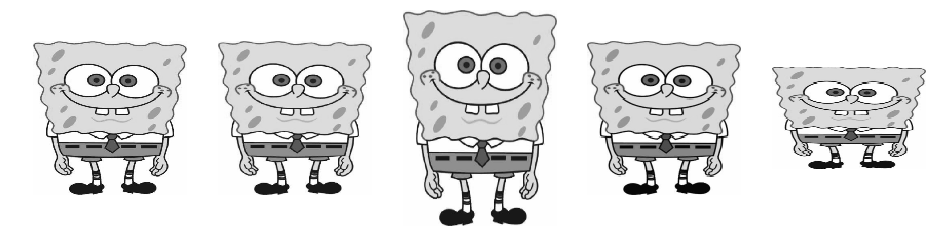

In [12]:
img_d = cv2.resize(img, (500, 500))
img_d_not = cv2.resize(img, (500, 700))
img_s = cv2.resize(img, (150, 150))
img_s_not = cv2.resize(img, (150, 100))

imgs=[img, img_d, img_d_not, img_s, img_s_not]

plt.figure(figsize=(16, 9))

for i in range(1, 6):
    plt.subplot(1,5, i)
    plt.axis('off')
    plt.imshow(imgs[i-1], cmap='gray')
    
plt.show()

In [13]:
def salt(img, size):
    img_s = img.copy()
    indexes = np.random.randint(0, img.shape[0], size=size)
    for i in range(size-1):
        img_s[indexes[i], indexes[i+1],:] = 255
    return img_s

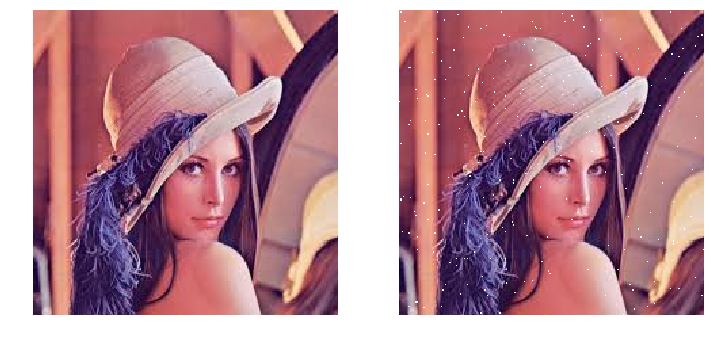

In [30]:
lena = cv2.imread('lena.jpg')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB )
lena = lena.astype(np.int)
lena_salt = salt(lena, 250)
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.axis('off')
plt.imshow(lena)
plt.subplot(122)
plt.axis('off')
plt.imshow(lena_salt)
plt.show()

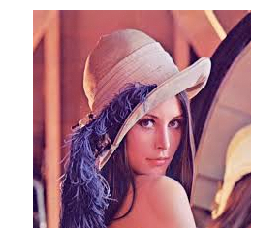

In [31]:
res = np.zeros_like(lena)
for i in range(100):
    _ = salt(lena, 250)
    res+=_
    
res = (res /100).astype(np.int)
plt.axis('off')
plt.imshow(res)
plt.show()

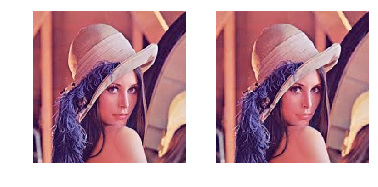

In [53]:
res = res.astype(np.uint8)
h, w = res.shape[:2]
res_b = cv2.resize(res, (int(h*1.5), int(w*1.5)), interpolation=cv2.INTER_CUBIC)
res_s = cv2.resize(res, (int(h*0.8), int(w*0.8)), interpolation=cv2.INTER_CUBIC)


plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(res_b)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(res_s)

In [66]:
def rotate(image, angle, center=None, scale=1.0, interpolation=cv2.INTER_CUBIC): #1
    """
    旋转变换可指定插值方法
    """
    (h, w) = image.shape[:2] #2
    if center is None: #3
        center = (w // 2, h // 2) #4

    M = cv2.getRotationMatrix2D(center, angle, scale) #5

    rotated = cv2.warpAffine(image, M, (w, h)) #6
    return cv2.resize(rotated, (h, w), interpolation)

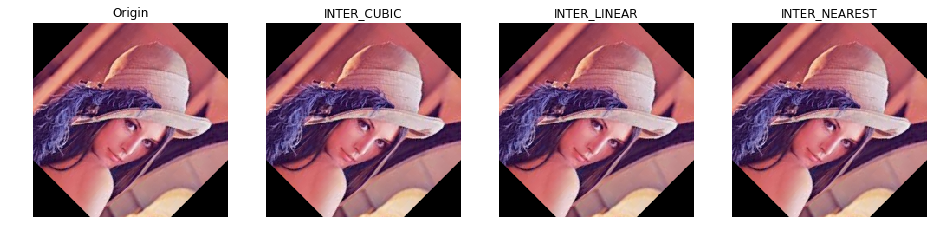

In [70]:
def show_rotate(img, angle=-45):
    interpolations = ['', 'CUBIC', 'LINEAR', 'NEAREST']
    plt.figure(figsize=(16, 9))
    for k in range(4):
        plt.subplot(1, 4, k+1)
        plt.axis('off')
        
        if k == 0:
            img_rotate = rotate(img, angle, interpolation=None)
            plt.title('Origin')
        else:
            if interpolations[k] == 'CUBIC':
                img_rotate = rotate(img, angle)
            if interpolations[k] == 'LINEAR':
                img_rotate = rotate(img, angle, interpolation=cv2.INTER_LINEAR)
            if interpolations[k] == 'NEAREST':
                img_rotate = rotate(img, angle, interpolation=cv2.INTER_NEAREST)
            plt.title('INTER_{}'.format(interpolations[k]))
        plt.imshow(img_rotate)
        
    plt.show()
    
show_rotate(res, )

In [ ]:
res[1]

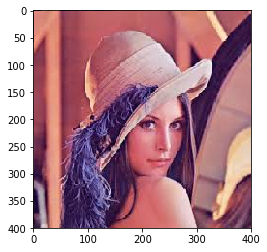

In [74]:
def f(img,m,n):
    height,width,channels =img.shape
    emptyImage=np.zeros((m,n,channels),np.uint8)
    value=[0,0,0]
    sh=m/height
    sw=n/width
    for i in range(m):
        for j in range(n):
            x = i/sh
            y = j/sw
            p=(i+0.0)/sh-x
            q=(j+0.0)/sw-y
            x=int(x)-1
            y=int(y)-1
            for k in range(3):
                if x+1<m and y+1<n:
                    value[k]=int(img[x,y][k]*(1-p)*(1-q)+img[x,y+1][k]*q*(1-p)+img[x+1,y][k]*(1-q)*p+img[x+1,y+1][k]*p*q)
            emptyImage[i, j] = (value[0], value[1], value[2])
    return emptyImage
res_blinear = f(res, 400, 400)
plt.imshow(res_blinear)

In [79]:
def resize(src, new_size):
    dst_w, dst_h = new_size # 目标图像宽高
    src_h, src_w = src.shape[:2] # 源图像宽高
    if src_h == dst_h and src_w == dst_w:
        return src.copy()
    scale_x = float(src_w) / dst_w # x缩放比例
    scale_y = float(src_h) / dst_h # y缩放比例

    # 遍历目标图像，插值
    dst = np.zeros((dst_h, dst_w, 3), dtype=np.uint8)
    for n in range(3): # 对channel循环
        for dst_y in range(dst_h): # 对height循环
            for dst_x in range(dst_w): # 对width循环
                # 目标在源上的坐标
                src_x = (dst_x + 0.5) * scale_x - 0.5
                src_y = (dst_y + 0.5) * scale_y - 0.5
                # 计算在源图上四个近邻点的位置
                src_x_0 = int(np.floor(src_x))
                src_y_0 = int(np.floor(src_y))
                src_x_1 = min(src_x_0 + 1, src_w - 1)
                src_y_1 = min(src_y_0 + 1, src_h - 1)

                # 双线性插值
                value0 = (src_x_1 - src_x) * src[src_y_0, src_x_0, n] + (src_x - src_x_0) * src[src_y_0, src_x_1, n]
                value1 = (src_x_1 - src_x) * src[src_y_1, src_x_0, n] + (src_x - src_x_0) * src[src_y_1, src_x_1, n]
                dst[dst_y, dst_x, n] = int((src_y_1 - src_y) * value0 + (src_y - src_y_0) * value1)
    return dst
